# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [387]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression

In [388]:
#Read the data into a dataframe
df_train = pd.read_csv("train-data.csv")
df_test = pd.read_csv("test-data.csv")

df_train.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [389]:
df_test.tail(50)

Unnamed: 0                                               Name  \
1184        1184                      Hyundai i20 Sportz Option 1.2   
1185        1185                        BMW 5 Series 2003-2012 520d   
1186        1186          Mercedes-Benz E-Class E250 CDI Avantgrade   
1187        1187        Toyota Innova 2.5 G (Diesel) 7 Seater BS IV   
1188        1188                             Maruti Swift Dzire ZDI   
1189        1189                                Maruti Alto K10 VXI   
1190        1190                      BMW 5 Series 520d Luxury Line   
1191        1191                    Maruti Vitara Brezza VDi Option   
1192        1192            Hyundai Verna Transform VTVT with Audio   
1193        1193                               Honda City i VTEC VX   
1194        1194                     Tata Indica Vista Quadrajet LS   
1195        1195                          Hyundai i20 Active 1.4 SX   
1196        1196                          Audi A6 2011-2015 2.0 TDI   
1197        1197  BMW X5 xDrive 30d Design Pure Experience 5 Seater   
1198        1198         Hyundai Creta 1.6 SX Plus Dual Tone Petrol   
1199        1199                  Maruti Vitara Brezza ZDi Plus AMT   
1200        1200                        Ford Fiesta 1.4 Duratec EXI   
1201        1201                               Maruti Dzire AMT VDI   
1202        1202                               Honda City i-VTEC VX   
1203        1203                              Maruti Celerio VXI AT   
1204        1204                               Chevrolet Captiva LT   
1205        1205                                 Datsun GO T Petrol   
1206        1206                       Skoda Superb Petrol Ambition   
1207        1207                             Hyundai Santro Xing GL   
1208        1208              Mahindra Renault Logan 1.5 DLE Diesel   
1209        1209                 Tata Tiago 1.05 Revotorq XT Option   
1210        1210                Volkswagen Vento Petrol Highline AT   
1211        1211                              Hyundai i20 1.2 Spotz   
1212        1212                  Ford EcoSport 1.5 Petrol Ambiente   
1213        1213                             Jeep Compass 1.4 Sport   
1214        1214                                    Audi A4 2.0 TDI   
1215        1215                      Hyundai Verna 1.6 SX VTVT (O)   
1216        1216                           Maruti Vitara Brezza ZDi   
1217        1217                       Hyundai Elite i20 Magna Plus   
1218        1218                              Honda Amaze S i-Dtech   
1219        1219                                    Audi A4 2.0 TDI   
1220        1220                          Honda Amaze VX AT i-Vtech   
1221        1221                            Honda Jazz 1.5 V i DTEC   
1222        1222                            BMW 5 Series 525d Sedan   
1223        1223                      Hyundai Grand i10 Asta Option   
1224        1224                     Renault Duster 85PS Diesel RxL   
1225        1225                              Chevrolet Aveo 1.4 LS   
1226        1226                              Honda Amaze S i-Vtech   
1227        1227                          Hyundai Grand i10 AT Asta   
1228        1228                            Hyundai EON D Lite Plus   
1229        1229                  Volkswagen Vento Diesel Trendline   
1230        1230                             Volkswagen Polo GT TSI   
1231        1231                             Nissan Micra Diesel XV   
1232        1232                             Volkswagen Polo GT TSI   
1233        1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...   

        Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1184   Bangalore  2015              33000    Petrol       Manual      First   
1185       Delhi  2011              58067    Diesel    Automatic      First   
1186  Coimbatore  2015              43020    Diesel    Automatic      First   
1187   Hyderabad  2014              27641    Diesel       Manual    

# 2. Loading and Cleaning with Pandas

In [390]:
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [391]:
df_test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [392]:
#Dorp Unnamed column 
df_train = df_train.drop(['Unnamed: 0'],axis=1)
df_test = df_test.drop(['Unnamed: 0'],axis=1)


In [393]:
## Drop New_Price column as it has many null values.
df_train = df_train.drop(['New_Price'],axis=1)
df_test = df_test.drop(['New_Price'],axis=1)


In [394]:
#Droping all other null values
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


In [395]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [396]:
## Converting Mileage, Engine and Power to numerical columns
df_train.Mileage = df_train.Mileage.str.split().str.get(0).astype('float')
df_train.Engine = df_train.Engine.str.split().str.get(0).astype('int', errors='ignore')
df_train.Power = df_train.Power.str.split().str.get(0).astype('float', errors='ignore')

df_test.Mileage = df_test.Mileage.str.split().str.get(0).astype('float')
df_test.Engine = df_test.Engine.str.split().str.get(0).astype('int', errors='ignore')
df_test.Power = df_test.Power.str.split().str.get(0).astype('float', errors='ignore')

In [397]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                 object
Seats                float64
Price                float64
dtype: object

# 3.  EDA and Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


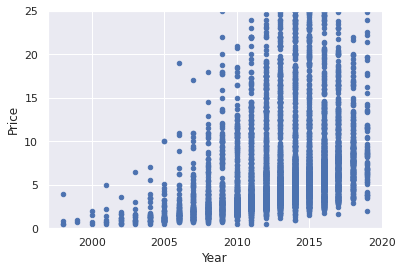

In [398]:
# Scatter plot Year / Price
attrib = 'Year'
data = pd.concat([df_train['Price'], df_train[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,25));


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


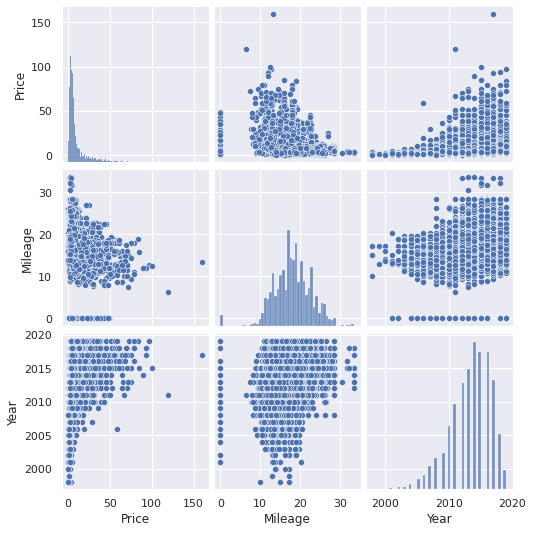

In [399]:
 #Scatter plot for numerical features
num_features = ["Price", "Mileage", "Year"]
sns.pairplot(df_train[num_features], size = 2.5)
plt.show();

# 4. Feature Engineering 

### Outlier Detection using IQR Method

In [400]:
print(df_train.Kilometers_Driven.min())
print(df_train.Kilometers_Driven.max())

171
6500000


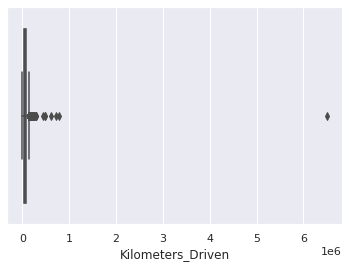

In [401]:
## Ploting boxplot to check outliers
sns.boxplot(x=df_train['Kilometers_Driven'])
plt.show()

In [402]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df_train.Kilometers_Driven.quantile(0.25)
Q3 = df_train.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [403]:
## checking outlier
df_train[(df_train.Kilometers_Driven < lowerlimit)  | (df_train.Kilometers_Driven > upperlimit)]

Name    Location  Year  \
29       Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007   
64                        Tata Indica V2 eLS     Chennai  2016   
77                      Toyota Innova 2.0 G1     Chennai  2006   
154      Skoda Superb Elegance 2.0 TDI CR AT        Pune  2012   
164        Ford Ecosport 1.5 DV5 MT Ambiente       Kochi  2014   
...                                      ...         ...   ...   
5852    Toyota Innova 2.5 G4 Diesel 8-seater     Chennai  2008   
5871  Ford Endeavour 4x2 XLT Limited Edition        Pune  2009   
5914          Skoda Octavia Elegance 1.9 TDI   Hyderabad  2003   
5953                    Ford Figo Diesel EXI      Jaipur  2012   
5957                      Honda City 1.5 EXI  Coimbatore  2004   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Mileage  \
29               262000    Diesel       Manual  Fourth & Above     12.8   
64               178000    Diesel       Manual           First     25.0   
77               230000    Petrol       Manual           Third     12.4   
154              136997    Diesel    Automatic           First     17.2   
164              147898    Diesel       Manual           First     22.7   
...                 ...       ...          ...             ...      ...   
5852             192000    Diesel       Manual           First     12.8   
5871             180000    Diesel       Manual           First     10.9   
5914             132000    Diesel       Manual           First     18.7   
5953             140000    Diesel       Manual           First     20.0   
5957             186679    Petrol       Manual          Second     13.0   

      Engine  Power  Seats  Price  
29      2494    102    7.0   4.00  
64      1396     69    5.0   2.50  
77      1998    132    8.0   4.50  
154     1968  138.1    5.0   8.50  
164     1498  89.84    5.0   4.42  
...      ...    ...    ...    ...  
5852    2494    102    8.0   6.85  
5871    2499    143    7.0   7.50  
5914    1896     66    5.0   2.25  
5953    1399     68    5.0   2.51  
5957    1493    100    5.0   1.76  

[201 rows x 12 columns]

In [404]:
## Drop all the rows containing height beyond lower and upper limit.
df_train = df_train[(df_train.Kilometers_Driven > lowerlimit) & (df_train.Kilometers_Driven < upperlimit)]
df_train.shape

(5774, 12)

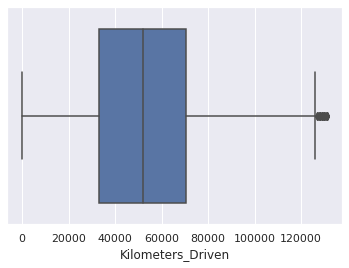

In [405]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df_train['Kilometers_Driven'])
plt.show()

In [406]:
print(df_train.Kilometers_Driven.min())
print(df_train.Kilometers_Driven.max())

171
131000


In [407]:
print(df_test.Kilometers_Driven.min())
print(df_test.Kilometers_Driven.max())

1000
350000


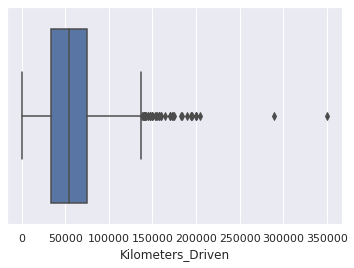

In [408]:
## Ploting boxplot to check outliers
sns.boxplot(x=df_test['Kilometers_Driven'])
plt.show()

In [409]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df_test.Kilometers_Driven.quantile(0.25)
Q3 = df_test.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [410]:
## checking outlier
df_test[(df_test.Kilometers_Driven < lowerlimit)  | (df_test.Kilometers_Driven > upperlimit)]

Name   Location  Year  \
3                        Toyota Etios Liva GD  Hyderabad  2012   
17                Ford Ikon 1.4 TDCi DuraTorq    Chennai  2009   
20                            Maruti Ritz LDi       Pune  2016   
58             Tata Indigo CS LX (TDI) BS III    Chennai  2011   
87          Tata Manza Club Class Safire90 LX      Kochi  2010   
142          Volkswagen Vento Diesel Highline     Jaipur  2011   
191                           Tata Indica DLS    Chennai  2006   
223                Tata Sumo EX 10/7 Str BSII    Chennai  2015   
265       Toyota Innova 2.5 V Diesel 8-seater  Hyderabad  2008   
269     Chevrolet Tavera LS B3 10 Seats BSIII  Hyderabad  2005   
270                Mahindra Xylo E8 ABS BS IV     Jaipur  2009   
291     Toyota Innova 2.5 G (Diesel) 8 Seater     Mumbai  2007   
332     Toyota Innova 2.5 G (Diesel) 7 Seater       Pune  2015   
350                 Tata Indigo eCS eLX BS IV       Pune  2013   
353               Fiat Linea Emotion (Diesel)     Mumbai  2009   
366                Toyota Fortuner 3.0 Diesel    Chennai  2011   
383               Maruti Swift Dzire Tour LDI       Pune  2013   
389                Maruti Omni MPI CARGO BSIV       Pune  2013   
392                         Toyota Corolla H2    Chennai  2006   
421                    Maruti Swift Dzire VDI       Pune  2015   
460                    Toyota Fortuner 4x4 MT       Pune  2011   
488                       Mahindra Bolero SLX     Jaipur  2013   
538      Toyota Innova 2.5 G4 Diesel 8-seater  Hyderabad  2008   
547    Toyota Innova 2.5 VX (Diesel) 8 Seater  Hyderabad  2012   
612                    Toyota Fortuner 4x2 AT      Delhi  2014   
633                    Toyota Fortuner 4x2 AT  Hyderabad  2013   
687                    Maruti Swift Dzire VXi    Chennai  2012   
773    Toyota Innova 2.5 GX (Diesel) 8 Seater    Chennai  2014   
778      Toyota Innova 2.5 G4 Diesel 7-seater       Pune  2010   
855                  Tata Indica Vista TDI LS       Pune  2015   
892       Toyota Innova 2.5 V Diesel 7-seater  Bangalore  2009   
900                   ISUZU D-MAX V-Cross 4X4     Jaipur  2017   
902               Maruti Swift Dzire Tour LDI     Jaipur  2012   
924             Hyundai Sonata Embera 2.4L MT       Pune  2006   
933                 Honda Amaze VX CVT i-VTEC     Jaipur  2017   
952                   Renault Lodgy 110PS RxL    Chennai  2015   
1028            Toyota Corolla Executive (HE)  Hyderabad  2007   
1062            Maruti Swift VDi BSIII W/ ABS     Jaipur  2008   
1130                     Hyundai Elantra CRDi     Mumbai  2006   
1164                    Hyundai Verna CRDi SX  Hyderabad  2009   
1179  Land Rover Discovery 4 TDV6 Auto Diesel  Hyderabad  2012   
1181                          Maruti Ritz LDi       Pune  2015   
1194           Tata Indica Vista Quadrajet LS  Hyderabad  2013   
1208    Mahindra Renault Logan 1.5 DLE Diesel    Chennai  2007   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
3                139000    Diesel       Manual      First    23.59    1364   
17               140000    Diesel       Manual      First    13.80    1399   
20               200000    Diesel       Manual      First    23.20    1248   
58               150000    Diesel       Manual     Second    19.09    1396   
87               142299    Petrol       Manual      First    13.07    1368   
142              157301    Diesel       Manual     Second    20.54    1598   
191              140000    Diesel       Manual     Second    13.50    1405   
223              196000    Diesel       Manual     Second    12.20    1948   
265              200000    Diesel       Manual     Second    12.80    2494   
269              150000    Diesel       Manual     Second    14.80    2499   
270              145278    Diesel       Manual     Second    11.68    2498   
291              194000    Diesel       Manual      First    12.99    2494   
332              205000    Diesel       Manual      Firs

In [411]:
## Drop all the rows containing height beyond lower and upper limit.
df_test = df_test[(df_test.Kilometers_Driven > lowerlimit) & (df_test.Kilometers_Driven < upperlimit)]
df_test.shape

(1179, 11)

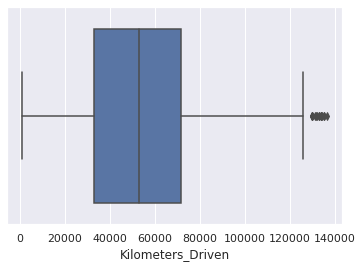

In [412]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df_test['Kilometers_Driven'])
plt.show()

In [413]:
print(df_test.Kilometers_Driven.min())
print(df_test.Kilometers_Driven.max())


1000
136441


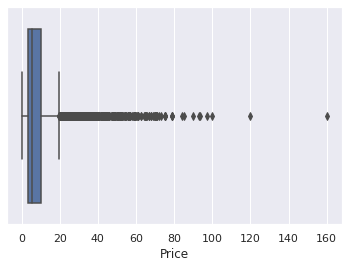

In [414]:
## Removing Outliers in Price
## Ploting boxplot to check outliers
sns.boxplot(x=df_train['Price'])
plt.show()

In [415]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = df_train.Price.quantile(0.25)
Q3 = df_train.Price.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
## checking outlier
df_train[(df_train.Price < lowerlimit)  | (df_train.Price > upperlimit)]

Name   Location  Year  \
13                    Land Rover Range Rover 2.2L Pure      Delhi  2014   
19    Mercedes-Benz New C-Class C 220 CDI BE Avantgare  Bangalore  2014   
22                Audi A6 2011-2015 35 TFSI Technology     Mumbai  2015   
38                    Mercedes-Benz M-Class ML 350 CDI       Pune  2013   
50                Audi A4 2.0 TDI 177 Bhp Premium Plus      Kochi  2015   
...                                                ...        ...   ...   
5946               BMW 5 Series 2013-2017 530d M Sport  Bangalore  2016   
5950                                   Audi Q3 2.0 TDI  Bangalore  2014   
5970                 Mercedes-Benz GLA Class 200 Sport      Kochi  2018   
5996                        Jaguar XF 2.2 Litre Luxury      Kochi  2016   
6008                           Porsche Panamera Diesel  Hyderabad  2013   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
13                72000    Diesel    Automatic      First    12.70    2179   
19                78500    Diesel    Automatic      First    14.84    2143   
22                55985    Petrol    Automatic      First    13.53    1984   
38                85000    Diesel    Automatic      First    11.74    2987   
50                13648    Diesel    Automatic      First    17.11    1968   
...                 ...       ...          ...        ...      ...     ...   
5946              16000    Diesel    Automatic      First    14.69    2993   
5950              65630    Diesel    Automatic      First    15.73    1968   
5970              17773    Petrol    Automatic      First    13.70    1991   
5996              31150    Diesel    Automatic      First    16.36    2179   
6008              40000    Diesel    Automatic     Second    17.85    2967   

       Power  Seats  Price  
13     187.7    5.0  27.00  
19    167.62    5.0  28.00  
22    177.01    5.0  23.50  
38     254.8    5.0  28.00  
50    174.33    5.0  21.43  
...      ...    ...    ...  
5946     258    5.0  48.00  
5950  174.33    5.0  21.75  
5970     183    5.0  26.76  
5996   187.7    5.0  30.54  
6008     300    4.0  45.00  

[708 rows x 12 columns]

In [416]:
## Drop all the rows containing height beyond lower and upper limit.
df_train = df_train[(df_train.Price > lowerlimit) & (df_train.Price < upperlimit)]


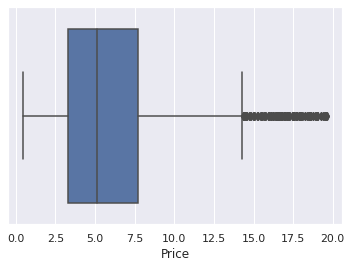

In [417]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df_train['Price'])
plt.show()

##Feature Scaling using MinMax Scaler

In [418]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                 object
Seats                float64
Price                float64
dtype: object

In [419]:
numeric_columns = ['Price','Kilometers_Driven','Mileage','Engine']
numericdf = df_train[numeric_columns]

In [420]:
numericdf.isna().sum() 

Price                0
Kilometers_Driven    0
Mileage              0
Engine               0
dtype: int64

In [421]:
numericdf.head() 

Price  Kilometers_Driven  Mileage  Engine
0   1.75              72000    26.60     998
1  12.50              41000    19.67    1582
2   4.50              46000    18.20    1199
3   6.00              87000    20.77    1248
4  17.74              40670    15.20    1968

In [422]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(numericdf)

In [423]:
#dataframe after scaling
transformdf = pd.DataFrame(data=numeric,columns=numeric_columns)
transformdf.head()

Price  Kilometers_Driven   Mileage    Engine
0  0.068194           0.549030  0.793083  0.089431
1  0.627798           0.312079  0.586464  0.229077
2  0.211348           0.350297  0.542636  0.137494
3  0.289433           0.663683  0.619261  0.149211
4  0.900573           0.309557  0.453190  0.321377

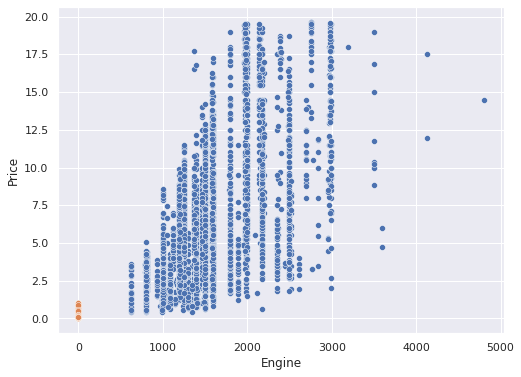

In [424]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data = df_train,x='Engine',y='Price')
sns.scatterplot(data = transformdf,x='Engine',y='Price')
plt.show() 

# 5. Training Model

In [425]:
## Applying Log to the Price to normalise it
df_train.Price = np.log1p(df_train.Price)

In [426]:
## Performing label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [427]:
df_train['Name'] = label_encoder.fit_transform(df_train['Name'])
df_train['Location'] = label_encoder.fit_transform(df_train['Location'])
df_train['Fuel_Type'] = label_encoder.fit_transform(df_train['Fuel_Type'])
df_train['Transmission'] = label_encoder.fit_transform(df_train['Transmission'])
df_train['Owner_Type'] = label_encoder.fit_transform(df_train['Owner_Type'])


df_test['Name'] = label_encoder.fit_transform(df_test['Name'])
df_test['Location'] = label_encoder.fit_transform(df_test['Location'])
df_test['Fuel_Type'] = label_encoder.fit_transform(df_test['Fuel_Type'])
df_test['Transmission'] = label_encoder.fit_transform(df_test['Transmission'])
df_test['Owner_Type'] = label_encoder.fit_transform(df_test['Owner_Type'])

df_train.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1031         9  2010              72000          0             1   
1   404        10  2015              41000          1             1   
2   379         2  2011              46000          3             1   
3   896         2  2012              87000          1             1   
4    14         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine  Power  Seats     Price  
0           0    26.60     998  58.16    5.0  1.011601  
1           0    19.67    1582  126.2    5.0  2.602690  
2           0    18.20    1199   88.7    5.0  1.704748  
3           0    20.77    1248  88.76    7.0  1.945910  
4           2    15.20    1968  140.8    5.0  2.930660

In [428]:
df_train.Power = pd.to_numeric(df_train.Power, errors='coerce')
df_test.Power = pd.to_numeric(df_test.Power, errors='coerce')

In [429]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
df_train[["Engine", "Power", "Seats"]] = imputer.fit_transform(df_train[["Engine", "Power", "Seats"]])
df_test[["Engine", "Power", "Seats"]] = imputer.fit_transform(df_test[["Engine", "Power", "Seats"]])

In [430]:
df_test.dtypes

Name                   int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

##Using Linear Regression

In [431]:
y = df_train.Price
X = df_train.drop(['Price'],axis=1)

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

In [433]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

# 6. Prediction

In [434]:
y_pred1 = model1.predict(X_valid)
y_pred1

array([0.68921202, 1.00849806, 1.45530989, ..., 1.66219048, 1.53322475,
       1.58219665])

In [435]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred1)))
print("R2 score : %f" % r2_score(y_valid,y_pred1))

Mean Absolute Error: 0.17135622839272138
Mean Squared Error: 0.050520815961246746
Root Mean Squared Error: 0.22476836067660133
R2 score : 0.802926


# 7. Evaluating your Model

In [436]:
Y_train_predicted = model1.predict(X_train)
Y_test_predicted = model1.predict(X_valid)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_valid,Y_test_predicted))

Train set accuracy:  0.8126924045709493
Test set accuracy :  0.8029255656642972


In [437]:
Result = pd.DataFrame({"Actual Price":y_valid,"Predicted Price":Y_test_predicted})
Result.head(10)

Actual Price  Predicted Price
2741      0.788457         0.689212
2162      1.178655         1.008498
4843      1.589235         1.455310
5835      2.104134         1.874753
4024      1.969906         1.959771
872       1.543298         1.856250
114       1.470176         1.699020
4767      0.741937         0.871164
5297      1.453953         1.374399
5503      1.704748         1.404674

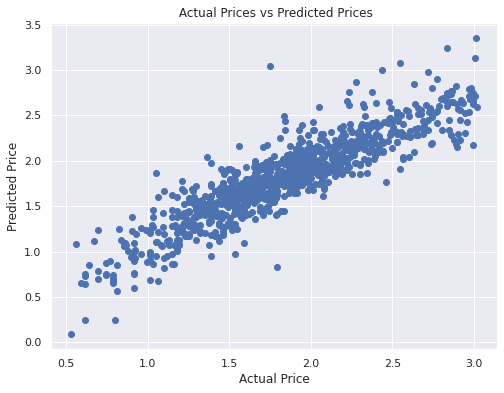

In [438]:
plt.scatter(y_valid, Y_test_predicted)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# SUBMISSION DATE: 2nd April 2022